# Preliminaries

In [38]:
import numpy as np
import random
import time
import statistics as st
import matplotlib.pyplot as plt

random.seed(time.perf_counter())

# A Model For The Evolution of Political Discussion On Twitter

In this code I will present a rudimentary model for the evolution of the behavior of Twitter users over time. For each user on twitter, we can assign them a rating from $-1$ to $1$ representing their general political leaning ($-1$ is left wing while $1$ is right-wing). We can also assign them a rating from $0$ to $1$ depending on their tolerance for dissenting opinions. At every set interval of time, users decide to stay off or stay on twitter depending on how much their political opinion is tolerated. In our model, users make this decision by evaluating the percentage of people that will tolerate their political opinion. If this percentage is too low, they will disengage from the platform.


## Some Different Ways Of Initializing Opinions

The results of the model will depend heavily on the actors we start with. Additionally, given the same set of actors, different results may be achieved depending on who starts on the platform first. Here, I will propose a number of different models of interest for generating actors that could be useful. As a guide for the stats:
1. Political opinion - A rating from -1 to 1 of a person's political opinion, assessing whether they are left-wing or right-wing.
2. Tolerance level - A rating from 0 to 1 that assesses to what extent a person is willing to engage with political opinions that differ from his own
3. Tolerance factor - A function of x that expresses the number of people who will tolerate opinion x.

### Uniform Model

In [51]:
political_opinions = [2*random.random()-1 for i in range(100)] #Opinions range from -1 (hard left) to 1 (hard right)
tolerance_level = [random.random() for i in range(100)] #Tolerance levels range from 0 to 1.
placement = [0 if i < 50 else 1 for i in range(100)] #Place 50 actors on Twitter to start
userbase = [[political_opinions[i], tolerance_level[i], placement[i]] for i in range(100)]

### Enlightened Centrist Model

In this model, opinions, are generated with a normal random variable and hence have a tendency towards the center. However, tolerance_levels are deterministic, and users who tend to the extreme become increasing less and less tolerant. Recall that 99.7% of data lies within three standard deviations of a normal random variable's mean. So we will generate a normal random variable with mean 0 and standard deviation $1/3$. We will use the function $(1/4) - (1/8)|x|$ to assign tolerance levels based on political opinion.

In [44]:
political_opinions = np.random.normal(0,1/3,size=100).tolist()
tolerance_level = [0.25 - 0.125*np.abs(political_opinions[i]) for i in range(100)]
placement = [0 if i < 50 else 1 for i in range(100)]
userbase = [[political_opinions[i], tolerance_level[i], placement[i]] for i in range(100)]

### Divided Country Model

In this model, users are either left-wing or right-wing. If they are a left-winger, we will assign them randomly a viewpoint based on $N(-1/2,1/6)$. Otherwise, we will designate them a right-winger, and assign them randomly a viewpoint based on $N(1/2,1/6)$. Here I choose for there to be more left-wingers than right-wingers.

In [67]:
political_opinions_1 = np.random.normal(-1/2,1/6,size=60).tolist()
political_opinions_2 = np.random.normal(1/2,1/6,size=40).tolist()

political_opinions = political_opinions_1 + political_opinions_2

tolerance_level = np.random.normal(1/4,1/12,size=100).tolist()
placement = [i%2 for i in range(100)]

userbase = [[political_opinions[i], tolerance_level[i], placement[i]] for i in range(100)]

## The Code

In [68]:
#Assess the tolerance factor for each political opinion that can be held
def tolerance_factor(x):
    val = 0
    for i in range(len(y)):
        if active_political_opinions[i] - active_tolerance_level[i] <= x and x <= active_political_opinions[i] + active_tolerance_level[i]:
            val = val+1
    return val

#x_factor = [2*(i/100) - 1 for i in range(100)]
#y_factor = [tolerance_factor(x_factor[i]) for i in range(100)]
#plt.plot(x_factor,y_factor)
#plt.xlim(-1,1)
#plt.ylim(0,user_count)

(0, 50)

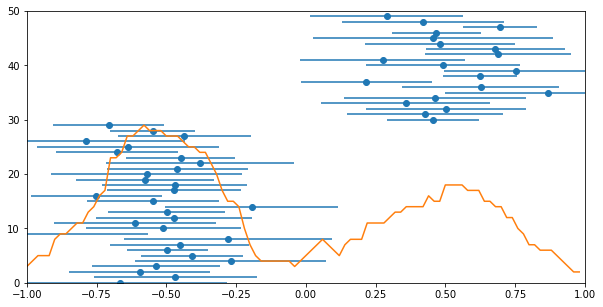

In [69]:
#Get a list of political opinions and tolerance levels for those who actively use Twitter

#active_political_opinions = [n for n in political_opinions if placement[political_opinions.index(n)] == 1]
#active_tolerance_level = [n for n in tolerance_level if placement[tolerance_level.index(n)] == 1]

active_userbase = [n for n in userbase if n[2] == 1]
user_count = len(active_userbase)

active_political_opinions = [active_userbase[i][0] for i in range(user_count)]
active_tolerance_level = [active_userbase[i][1] for i in range(user_count)]

#It will help for visual purposes to graph this user base on a graph
y = [i for i in range(sum(placement))]
user_count = len(y)
plt.figure(figsize=(10,5))
plt.scatter(active_political_opinions,y)
plt.ylim(0,user_count)
plt.xlim(-1,1)
plt.errorbar(active_political_opinions,y, xerr=active_tolerance_level, fmt="none")

x_factor = [2*(i/100) - 1 for i in range(100)]
y_factor = [tolerance_factor(x_factor[i]) for i in range(100)]
plt.plot(x_factor,y_factor)
plt.xlim(-1,1)
plt.ylim(0,user_count)

(0, 56)

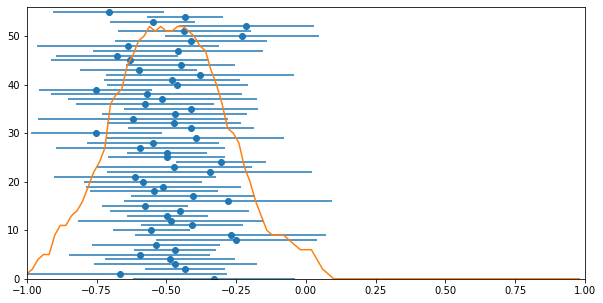

In [72]:
#Now for each user, let's assess whether they should use the platform depending on much their opinion is tolerated:
i = 0
for x in userbase:
    if tolerance_factor(x[0])/user_count < (1/3):
        x[2] = 0
        #print("User " + str(i) + " is off Twitter")
    else:
        x[2] = 1
        #print("User " + str(i) + " is on Twitter")
    i = i+1

#print(placement)
#print("There are now " + str(sum(placement)) + " users on Twitter.")

#Get a list of political opinions and tolerance levels for those who actively use Twitter

active_userbase = [n for n in userbase if n[2] == 1]
user_count = len(active_userbase)

active_political_opinions = [active_userbase[i][0] for i in range(user_count)]
active_tolerance_level = [active_userbase[i][1] for i in range(user_count)]

#It will help for visual purposes to graph this user base on a graph
y = [i for i in range(len(active_userbase))]
plt.figure(figsize=(10,5))
plt.scatter(active_political_opinions,y)
plt.ylim(0,user_count)
plt.xlim(-1,1)
plt.errorbar(active_political_opinions,y, xerr=active_tolerance_level, fmt="none")

x_factor = [2*(i/100) - 1 for i in range(100)]
y_factor = [tolerance_factor(x_factor[i]) for i in range(100)]
plt.plot(x_factor,y_factor)
plt.xlim(-1,1)
plt.ylim(0,user_count)

# Further Work

For now, the code has some limitations:
1. People may change their opinion or level of tolerance, but this is not reflected in model in any way.
2. Right now, the model assess whether users enter or leave the platform by comparing the percentage of users who tolerate their opinion against a certain threshold. For now, this threshold is set at 33.3%, but a better model would vary this percentage from user to user.

# Scrap Code (This Isn't Used)

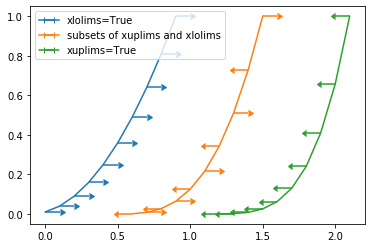

In [9]:
fig = plt.figure()
x = np.arange(10) / 10
y = (x + 0.1)**2

plt.errorbar(x, y, xerr=0.1, xlolims=True, label='xlolims=True')
y = (x + 0.1)**3

upperlimits = [True, False] * 5
lowerlimits = [False, True] * 5
plt.errorbar(x + 0.6, y, xerr=0.1, xuplims=upperlimits, xlolims=lowerlimits,
             label='subsets of xuplims and xlolims')

y = (x + 0.1)**4
plt.errorbar(x + 1.2, y, xerr=0.1, xuplims=True, label='xuplims=True', solid_capstyle = "round")

plt.legend()
plt.show()

<ErrorbarContainer object of 3 artists>

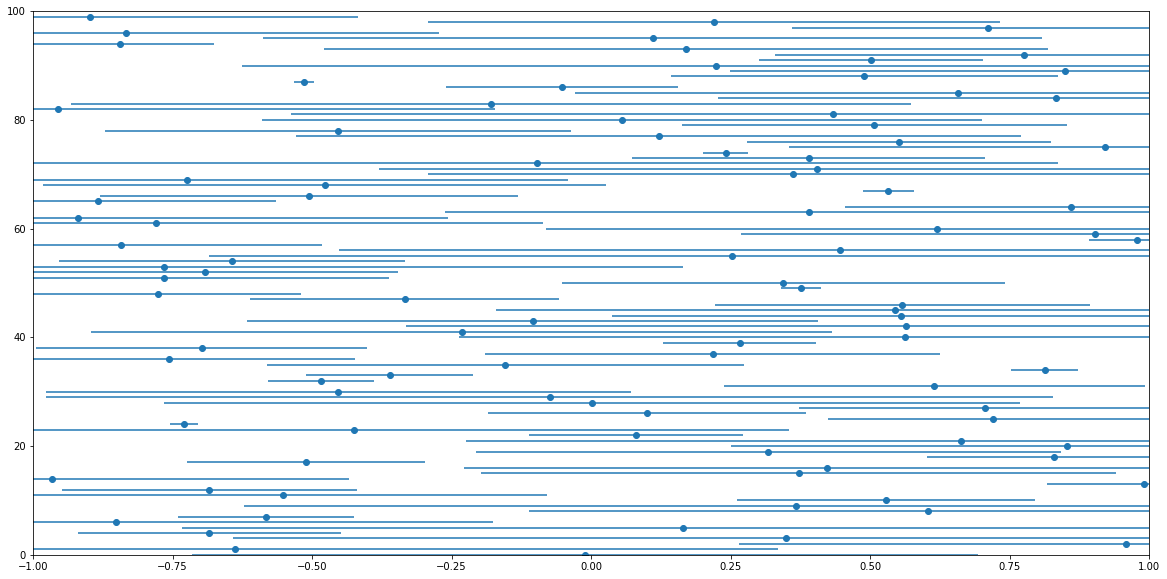

In [32]:
#Graph on a scatter plot our actors and their levels of tolerance
y = [i for i in range(100)]
plt.figure(figsize=(20,10))
plt.scatter(political_opinions,y)
plt.ylim(0,100)
plt.xlim(-1,1)
plt.errorbar(political_opinions,y, xerr=tolerance_level, fmt="none")

[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
There are now 71 users on Twitter.


(0, 71)

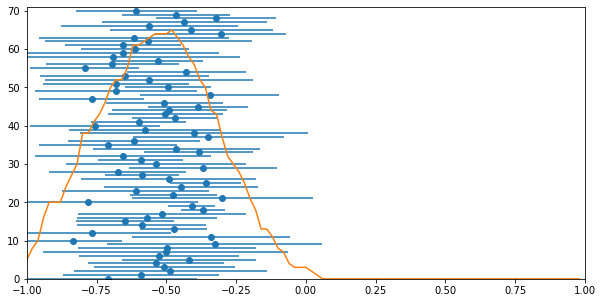

In [168]:
#Now for each user, let's assess whether they should use the platform depending on much their opinion is tolerated:
i = 0
for x in political_opinions:
    if tolerance_factor(x)/user_count < (1/3):
        placement[i] = 0
        #print("User " + str(i) + " is off Twitter")
    else:
        placement[i] = 1
        #print("User " + str(i) + " is on Twitter")
    i = i+1
    
print(placement)
print("There are now " + str(sum(placement)) + " users on Twitter.")

#Get a list of political opinions and tolerance levels for those who actively use Twitter

active_political_opinions = [n for n in political_opinions if placement[political_opinions.index(n)] == 1]
active_tolerance_level = [n for n in tolerance_level if placement[tolerance_level.index(n)] == 1]

#It will help for visual purposes to graph this user base on a graph
y = [i for i in range(sum(placement))]
user_count = len(y)
plt.figure(figsize=(10,5))
plt.scatter(active_political_opinions,y)
plt.ylim(0,user_count)
plt.xlim(-1,1)
plt.errorbar(active_political_opinions,y, xerr=active_tolerance_level, fmt="none")

x_factor = [2*(i/100) - 1 for i in range(100)]
y_factor = [tolerance_factor(x_factor[i]) for i in range(100)]
plt.plot(x_factor,y_factor)
plt.xlim(-1,1)
plt.ylim(0,user_count)

In [87]:
#Generate actors with varying political opinions and tolerance levels for dissenting opinions

#We'll start by generating 100 actors to begin
political_opinions = [2*random.random()-1 for i in range(100)] #Opinions range from -1 (hard left) to 1 (hard right)
tolerance_level = [random.random() for i in range(100)] #Tolerance levels range from 0 to 1.
#EXAMPLE: If a person has opinion -0.5 and tolerance 0.5, he tolerates opinions from -1 to 0.

In [88]:
#Place 50 of our actors in the social media sphere.
placement = [0 if i < 50 else 1 for i in range(100)] 
#0 denotes not being on Twitter
#1 denotes being on Twitter

<ErrorbarContainer object of 3 artists>

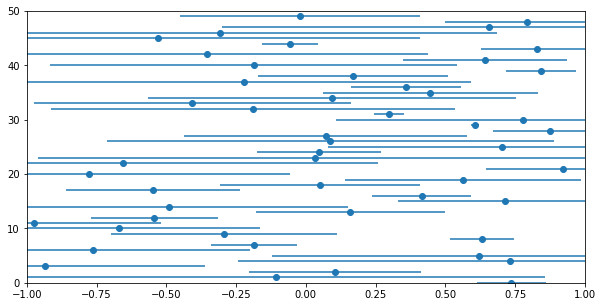

In [73]:
#Graph on a scatter plot our actors that are currently on social media and their levels of tolerance
y = [i for i in range(sum(placement))]
user_count = len(y)
active_political_opinions = [n for n in political_opinions if placement[political_opinions.index(n)] == 1]
active_tolerance_level = [n for n in tolerance_level if placement[tolerance_level.index(n)] == 1]
plt.figure(figsize=(10,5))
plt.scatter(active_political_opinions,y)
plt.ylim(0,user_count)
plt.xlim(-1,1)
plt.errorbar(active_political_opinions,y, xerr=active_tolerance_level, fmt="none")

## Update time

For each actor, assess whether they will use the platform or get off the platform depending on the tolerance factor their opinion holds in Twitter. We will compare the tolerance factor with the number of people using the site. If this ratio is too low, then the user will exit or stay off the platform. If it is high enough, they will remain on or enter the platform.